# Fig 5: Frequency dependence - Panel C

In [1]:
from directory_paths import SAVE_DIR
from train.train_model_utils import *
import pandas as pd
from utils.analysis_plots_helper import *

In [2]:
original_hex_biceps = "#FF3B30"
original_hex_tri = "#00C7BE"
MARKER_LIST = ["o", "X", "^", "p", "d", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]

set_publication_style()

In [3]:
### Load directly from downloaded figure data if available 
num_vib_muscles = 2
num_cols = 9

# Uncomment each line for each frequency range in the paper

test_exp_dir = "vib_vary_multipleFs_fixFmax-100-101" # 100 Hz for trained model
# test_exp_dir = "vib_vary_multipleFs_fixFmax-100-150"
# test_exp_dir = "vib_vary_multipleFs_fixFmax-50-100"
# test_exp_dir = "vib_vary_multipleFs_fixFmax-150-200"
# test_exp_dir = "vib_vary_multipleFs_fixFmax-50-51"

df_file_path = os.path.join(
    SAVE_DIR,
    "data_for_figs", 
    f"df_all_vib_vary_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5")

### Or load from vibration experiments directly
n_aff = 5
task = "letter_reconstruction_joints"
train_seeds_to_load = ['0','1','2','9']
## For pre-trained models downloaded
model_path = os.path.join(
    SAVE_DIR,
    f"trained_models/experiment_causal_flag-pcr_optimized_linear_extended_{n_aff}_{n_aff}_{task}/",
)
INPUT_DATA = "ES3D"
PATH_TO_SAVE = model_path + "/" + "test" + "/" + INPUT_DATA + "/" + test_exp_dir
# train_seeds_to_load = ['0','1','2','3']


# coef_seeds_to_load = [0,1,2,3,4]
coef_seeds_to_load = None # use all
vib_muscles = ["TRIlat_TRIlong_TRImed", "BIClong_BICshort"] # all containing that muscle 
vib_range = None

columns_to_load = ["vib_freq", "vib_muscles", "trial", "elbow_angle", "vib_angle_diff_elbow"]

path_save = model_path + "/plots/" + test_exp_dir
if not os.path.exists(path_save):
    os.makedirs(path_save)
    print("created directory ", path_save)

created directory  /media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_multipleFs_fixFmax-100-101


## Load data

In [4]:
# df_file_path = "none"
loaded_from_hdf = False

# Load data from hdf5 file if it exists 
if os.path.exists(df_file_path):
    print("loading df_all from ", df_file_path)
    df_all = pd.read_hdf(df_file_path, key="df", mode="r")
    loaded_from_hdf = True
else:
    df_all = load_vibration_data(
        model_path=model_path,
        test_exp_dir=test_exp_dir,
        vib_muscles=vib_muscles,
        vib_range=vib_range,
        columns_to_load=columns_to_load,
        coef_seeds_to_load=coef_seeds_to_load,
        train_seeds_to_load=train_seeds_to_load,
        input_data=INPUT_DATA,
        sample_rate=SAMPLE_RATE,
        exact_vib_muscles=True
    )

loading df_all from  /media/data16/adriana/ProprioPerception/0_Zenodo/data_for_figs/df_all_vib_vary_vib_vary_multipleFs_fixFmax-100-101_2Muscles_numCols-9.h5


In [5]:
# keep only rows with vib_muscles_str = TRI or BIC
df_all_f = df_all[df_all["vib_muscles_str"].isin(["TRI", "BIC"])]

# remove rows with same coef_seed, train_seed, vib_musclse_str, vib_freq and trial
df_all_f = df_all_f.drop_duplicates(subset=["coef_seed", "train_seed", "vib_muscles_str", "vib_freq", "trial"], keep="first")

# make sure we have 5 coef seeds, 4 train_seeds per coef_seed
# 100 trials per condition 
# all the vib freqs per model [0, 10, 20, 40, 60, 80, 100, 110, 130, 150, 170, 190]
# all the vib muscles per model ['BIC', 'TRI']
# should have 9600 trials per coef seed, 2400 trials per coef seed/train seed combination
# summary = summarize_dataframe(df_all_f)
# print(summary)

df_all = df_all_f

In [6]:
# save df
if not loaded_from_hdf:
    num_cols = len(df_all.columns)
    num_vib_muscles = len(df_all["vib_muscles_str"].unique())
    df_file_path = model_path + f"/df_all_vib_vary_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5"
    # save df_all to h5 file
    df_all.to_hdf(df_file_path, key="df", mode="w")
    print("saved df_all to ", df_file_path)


In [7]:
unique_seeds = df_all["coef_seed"].unique()
unique_seeds.sort()
seed_marker_map = {seed: MARKER_LIST[i] for i, seed in enumerate(unique_seeds)}
df_all["vib_muscles_str"].unique()

array(['TRI', 'BIC'], dtype=object)

In [8]:
path_save

'/media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_multipleFs_fixFmax-100-101'

## Panel C 

saved as  mean_vib_angle_diff_vsfreq_TRI_all_per_None.svg


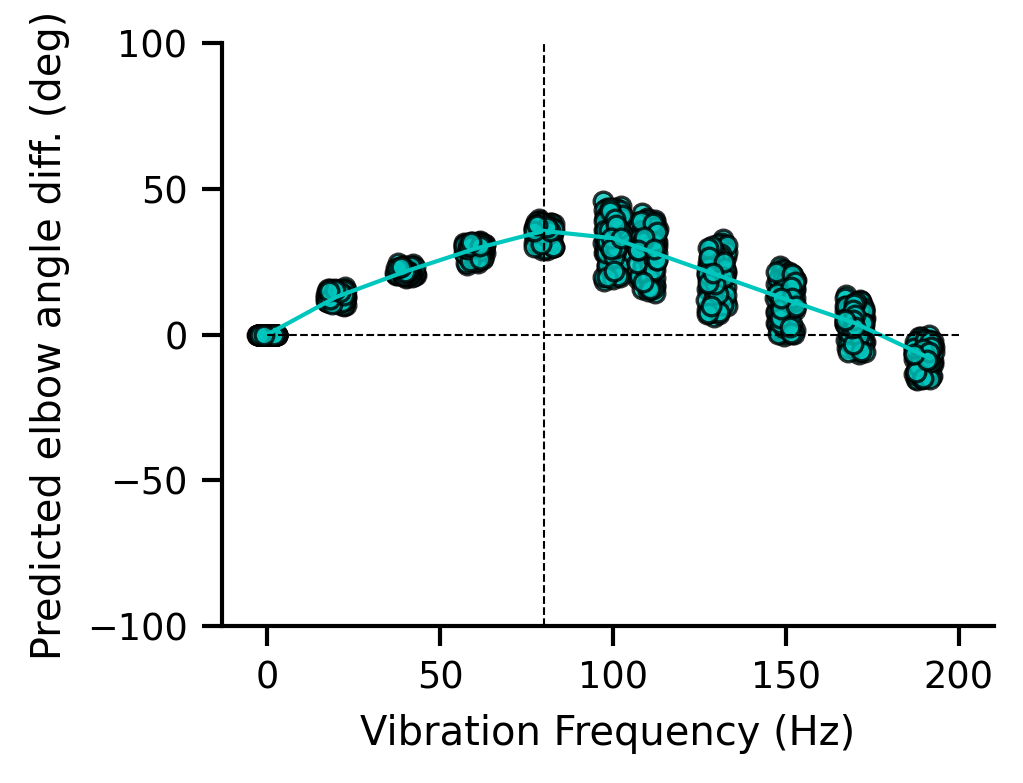

saved as  mean_vib_angle_diff_vsfreq_BIC_all_per_None.svg


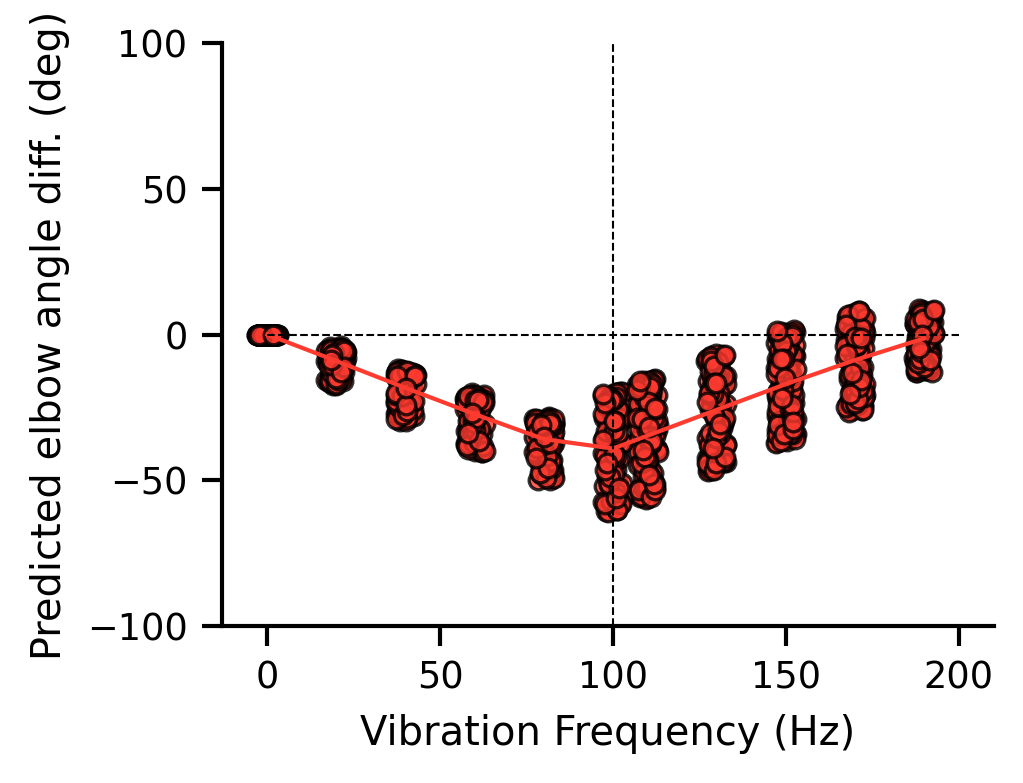

In [9]:
ylim = 100
vib_m_str_to_plot = df_all["vib_muscles_str"].unique()
for vib_muscles_str in vib_m_str_to_plot:
    df_f = df_all[df_all["vib_muscles_str"] == vib_muscles_str]
    if "TRI" in vib_muscles_str:
        color = original_hex_tri
    elif "BIC" in vib_muscles_str:
        color = original_hex_biceps
    elif "ANC" in vib_muscles_str:
        color = original_hex_tri
    elif "BRA" in vib_muscles_str:
        color = original_hex_biceps
    else:
        color = "gray"
    plot_angleOffset_vs_vibration(df_f, path_save, color, vib_muscles_str+"_all","vib_angle_diff_elbow", None, ylim=ylim, maxLine=True)